# Purpose

To perform exploratory data analysis of dataset provided by the  U.S. Office of Foreign Labor Certification website.The dataset used can be found here... 

### Context

When a U.S. company wants to hire someone from outside of the United States for a special tier or technical position, they have to file an application with the United States government to get a visa for the applicant so that the applicant is allowed to stay in the country. Typically, the company will either file a green card application, called the perm application, or a labor condition application, called an LCA.LCAs include other specialty working visas, like H-1B visas.


### Questions I asked myself before start performing analysis (highly random and used to boost curiosity)

- In what states the Software engineers,data scientists,data analysts earn most?
- What is the salary variations among different job profiles in different states?
- How many applications were accepted per job profile?
- Is there any pattern emerging for growing salaries among job profiles?
- What is the most applied visa categry?
- What is the variation in job profiles among different countries?
- What is the success ration of visa approvals?
 - Which country has max visa approvals ratio?


# PRIMARY DATA OPERATIONS (cleaning and filtering)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore') # this is used to ignore the warnings in the output

#importing file
path = 'C:\\Users\\Vivek\\Desktop\\PythonPrograms\\salary_data.xlsx'
dataset= pd.read_excel(path)

# this function is created to get rid of using info and head command on any dataset repeatedly
def data_basics(data):
    import pandas as pd
    head=data.head()
    info=print(data.info(),end='\n\n\n')
    return head, info


In [2]:
# Converting selelctive columns dtype to 'category' for better grouping

lis=['COUNTRY_OF_CITIZENSHIP','VISA_CLASS','JOB_TITLE_SUBGROUP','FULL_TIME_POSITION_Y_N','EXPERIENCE_REQUIRED_Y_N',\
     'EDUCATION_LEVEL_REQUIRED','PAID_WAGE_SUBMITTED_UNIT','CASE_STATUS','WORK_STATE']
for word in lis:
    
    dataset[word]=dataset[word].astype('category')
      

In [3]:
# Slicing dataset into sub dataset that serves columns only to perform salary based analysis

salary_columns= [ 'JOB_TITLE_SUBGROUP','JOB_TITLE','PREVAILING_WAGE_SUBMITTED','PREVAILING_WAGE_SUBMITTED_UNIT',\
                 'PAID_WAGE_SUBMITTED','PAID_WAGE_SUBMITTED_UNIT','PAID_WAGE_PER_YEAR','FULL_TIME_POSITION_Y_N','WORK_STATE',\
                 'VISA_CLASS','CASE_RECEIVED_DATE']

salary = dataset.loc[:,salary_columns]


In [4]:
data_basics(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 26 columns):
CASE_NUMBER                       167278 non-null object
CASE_STATUS                       167278 non-null category
CASE_RECEIVED_DATE                167278 non-null object
DECISION_DATE                     167278 non-null object
EMPLOYER_NAME                     167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
JOB_TITLE                         167278 non-null object
WORK_CITY                         167275 non-null object
EDUCATION_LEVEL_REQUIRED          11093 non-null category
COLLEGE_MAJOR_REQUIRED            11051 non-null object
EXPERIENCE_REQUIRED_Y_N           11093 non-null category
EXPERIENCE_REQUIRED_NUM_MONTHS    4965 non-null float64
COUNTRY_OF_CITIZENSHIP      

(          CASE_NUMBER CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
 0  I-200-14073-248840      denied          3/14/2014     3/21/2014   
 1       A-15061-55212      denied          3/19/2015     3/19/2015   
 2  I-200-13256-001092      denied          9/13/2013     9/23/2013   
 3  I-200-14087-353657      denied          3/28/2014      4/7/2014   
 4  I-203-14259-128844      denied          9/16/2014     9/23/2014   
 
                                        EMPLOYER_NAME  \
 0                ADVANCED TECHNOLOGY GROUP USA, INC.   
 1                     SAN FRANCISCO STATE UNIVERSITY   
 2                                    CAROUSEL SCHOOL   
 3  HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...   
 4                        SIGNAL SCIENCES CORPORATION   
 
    PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
 0                  6217100.0                           year   
 1                  5067600.0                           year   
 2                  4947000.0       

---

# Data visualization

In [5]:
#Setting up the default figure size
sns.set(rc={'figure.figsize':(10,8)},style='white')

# salaries of data related rows

### BAR PLOTS variations

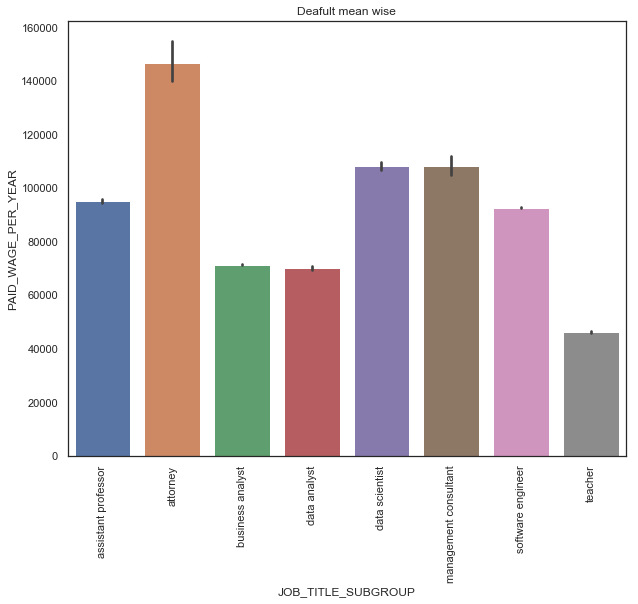

In [6]:
# prevaling wage difference and paid wage difference yearly 
# MEAN is the statistical method used to see variation

mean_salary_job_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,)
plt.xticks(rotation=90)
plt.title('Deafult mean wise')
plt.show()

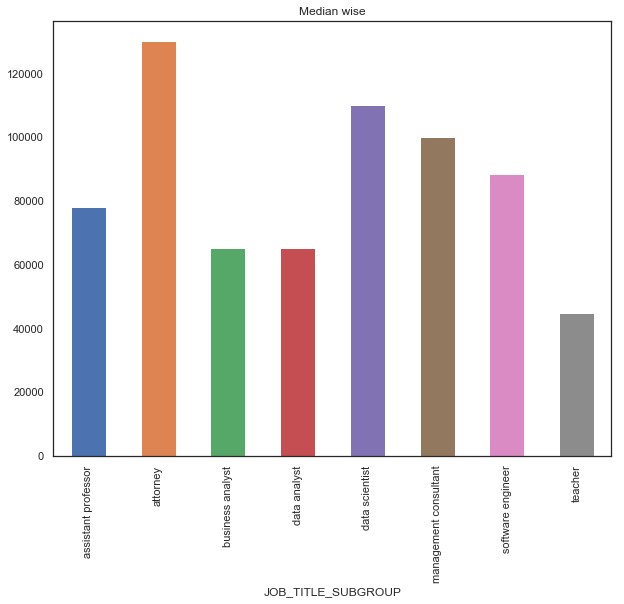

In [7]:
# Using grouping method as on standard pandas.plot method. 
# It was done as till now,I didnt know how to change 'estimator' arg. in seaborn barplot form mean to any other method
median_salary_group= salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].median()

# MEDIAN is the statistical method used to see variation
median_salary_job_plot = median_salary_group.plot('bar')
plt.title('Median wise')
plt.show()

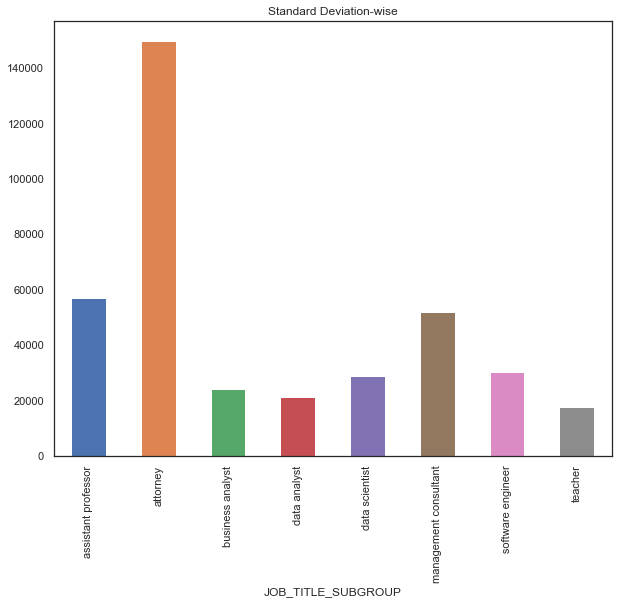

In [8]:
# Same reason as above.
stdev_salary_group=salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].std()

# STANDARD DEVIATION is the statistical method used to see variation
stdev_salary_job_plot= stdev_salary_group.plot('bar')
plt.title('Standard Deviation-wise')
plt.show()

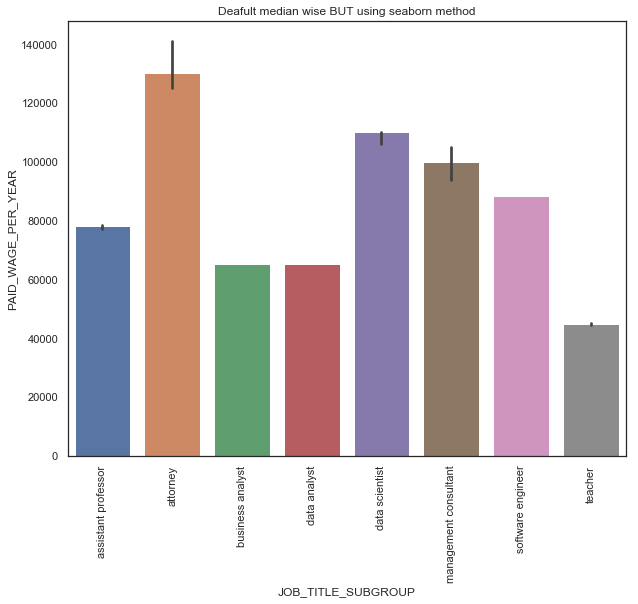

In [9]:
# as seen above plots we could see, we use df.plots methods for median or stdev plots, unable to manpiulate'estimator' arg in sns
# now, we can use numpy liberary fucntions to perform same analysis
'''ADVANTAGE
    1. Here, no need to group data and applying method prior'''

import numpy as np
median_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.median)
plt.xticks(rotation=90)
plt.title('Deafult median wise BUT using seaborn method')
plt.show()

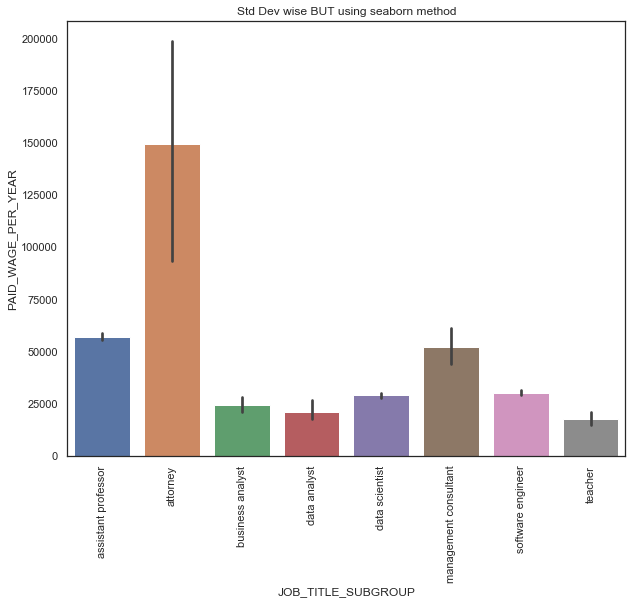

In [10]:
#plottind std deviation graph using seaborn
STD_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.std,)
plt.xticks(rotation=90)
plt.title('Std Dev wise BUT using seaborn method')
plt.show()

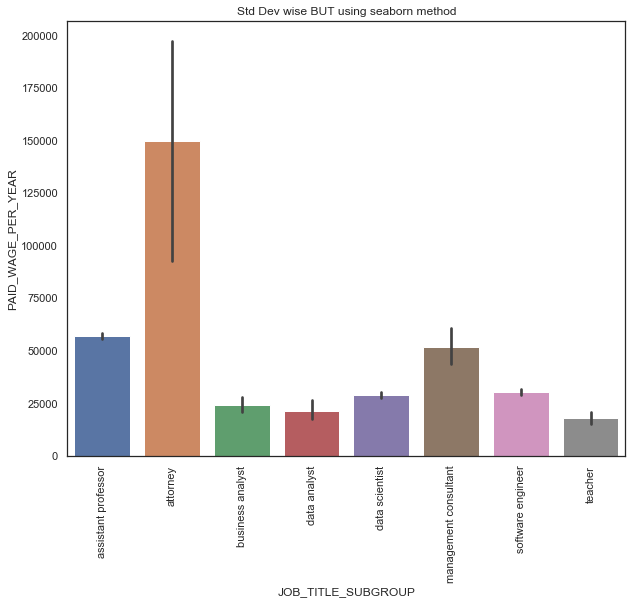

In [11]:
#plotting unsorted graph     
STD_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.std,)
plt.xticks(rotation=90)
plt.title('Std Dev wise BUT using seaborn method')
plt.show()

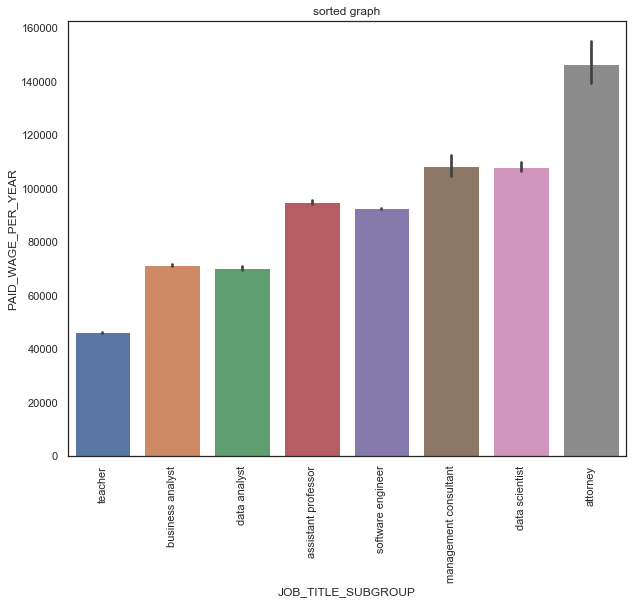

In [12]:
# sorting data points
result = salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].aggregate(np.median).reset_index()\
                                                                              .sort_values('PAID_WAGE_PER_YEAR')

#sorted graph
result_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,data=result,order=result['JOB_TITLE_SUBGROUP'])
plt.xticks(rotation=90)
plt.title('sorted graph')
plt.show()
result_plot.figure.savefig('output.jpeg',bbox_inches='tight')

In [13]:
result

,JOB_TITLE_SUBGROUP,PAID_WAGE_PER_YEAR
7,teacher,44896.0
2,business analyst,65000.0
3,data analyst,65000.0
0,assistant professor,78000.0
6,software engineer,88275.2
5,management consultant,100000.0
4,data scientist,110000.0
1,attorney,130000.0


## Conclusion/Analysis

- Highest Salary job are __Attorney__ followed by __Data Scientists and Managment consultants__ .
- While teaching profession is least paid.


## VISA based job analysis

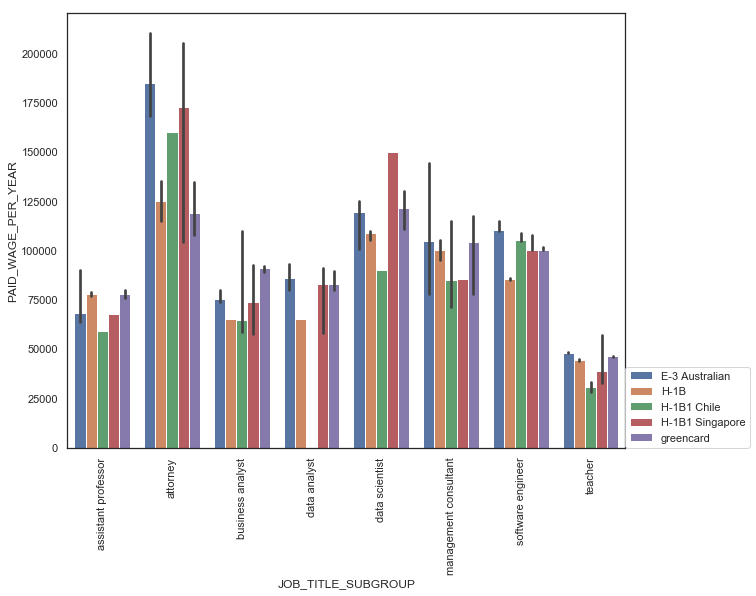

In [14]:
visa_job_bar = sns.barplot(x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.VISA_CLASS)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

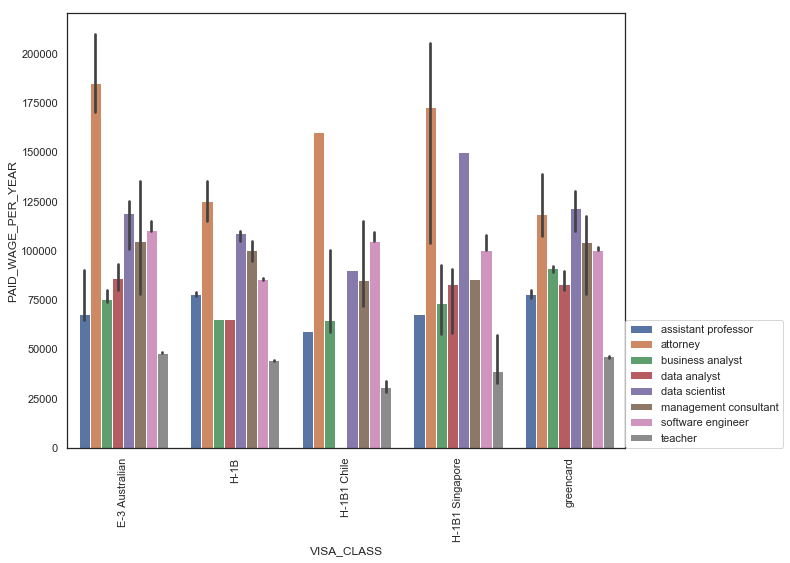

In [15]:
visa_job_bar1 = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.JOB_TITLE_SUBGROUP)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

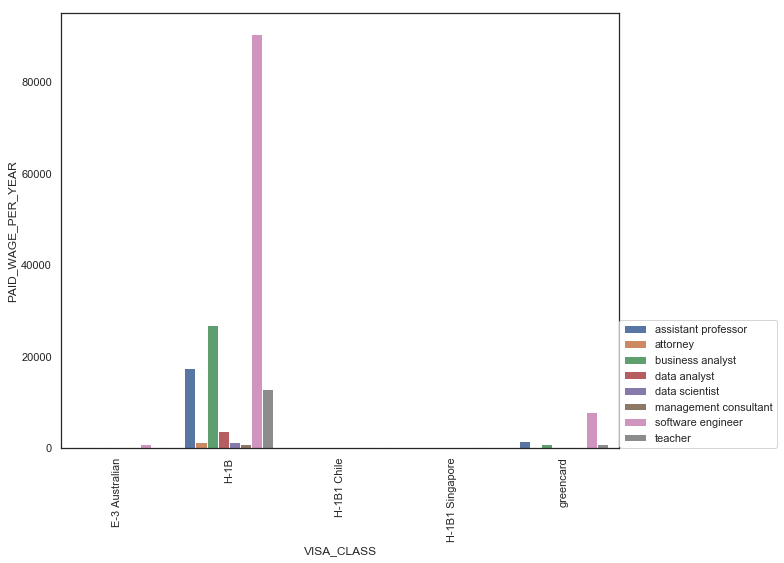

In [16]:
# this performs of counts of records per visa class
visa_job_count_bar = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count,\
                                 hue=salary.JOB_TITLE_SUBGROUP)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

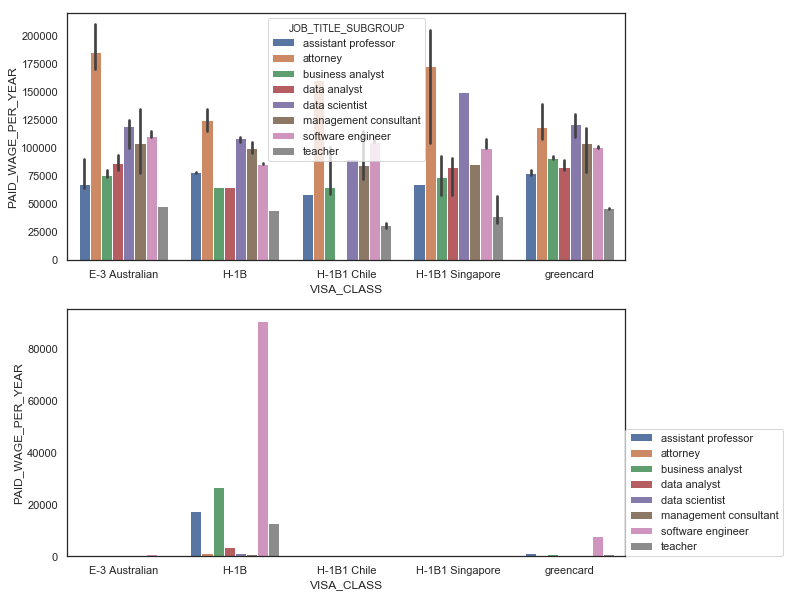

In [17]:
# using above tow graphs in subplots manner
f,axes= plt.subplots(2,1,figsize=(10,10),)

visa_job_bar1 = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,\
                            hue=salary.JOB_TITLE_SUBGROUP,ax=axes[0])
visa_job_count_bar = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count\
                                 ,hue=salary.JOB_TITLE_SUBGROUP,ax=axes[1])

plt.legend(loc=(1,0))
plt.show()
f.savefig('subplot.jpeg',bbox_inch='Bbox')

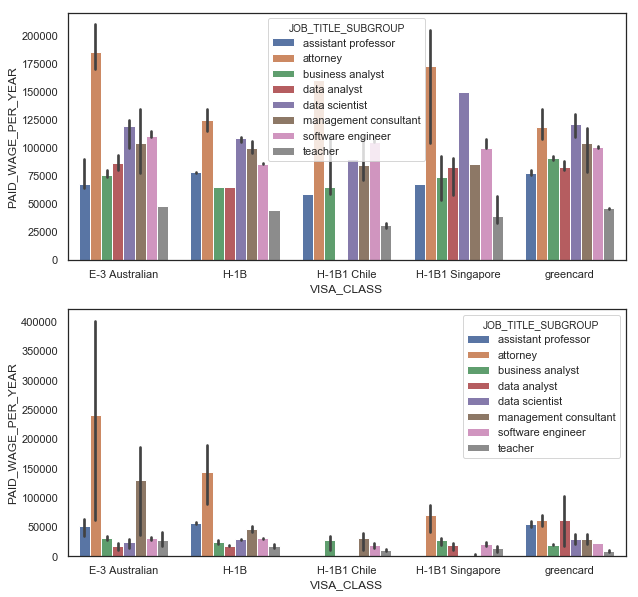

In [18]:
# checking the relation bw 2 graphs
#1. median of salarys
#2. std of salaries

f,axes= plt.subplots(nrows=2,ncols=1,figsize=(10,10))

visa_salary_median= sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.JOB_TITLE_SUBGROUP\
                                ,ax=axes[0])


visa_salary_std= sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.std,hue=salary.JOB_TITLE_SUBGROUP,\
                             ax=axes[1])
plt.show()

### Conclusion

- We learnt that highest number of Visa that is used to bring foriegn talent in the U.S.A. is the __H1B__ followed by the __Green Card__.
- Most hiring positions were __Software Engineers__ followed by __Business Analyst__ through __H1B_ visa__.

---

## Question: Wouldn't my salary likely to change in different states for data analysis related jobs.

Understanding how salaries vary among different states in U.S.A.

In [19]:

dic={'WA':'WASHINGTON','CA':'CALIFORNIA','CO':'COLORADO','TX':'TEXAS','AL':'ALABAMA','NC':'NORTH CAROLINA','NY':'NEW YORK',\
     'MA':'MASSACHUSETTS','ME':'MAINE'}

# refining state names by replacing abbreviations with full name of required set from 'WORK_STATE' column
dataset['WORK_STATE']= dataset.WORK_STATE.replace( {'WA':'WASHINGTON','CA':'CALIFORNIA','CO':'COLORADO','TX':'TEXAS',\
                                                    'AL':'ALABAMA','NC':'NORTH CAROLINA','NY':'NEW YORK','MA':'MASSACHUSETTS',\
                                                    'ME':'MAINE'})

In [20]:
# we are concerned about few states, where we want to analyse jobs related information mentioned as follows
state=['NEW YORK','WASHINGTON','CALIFORNIA','COLORADO','TEXAS','ALABAMA','NORTH CAROLINA','MASSACHUSETTS','MAINE']

want_states=[]
for word in dataset.WORK_STATE:
    if word not in state:
        want_states.append(word)

dataset['WORK_STATE']= dataset.WORK_STATE.replace(want_states,'OTHERS')

In [21]:
# Slicing dataset into sub dataset that serves columns only to perform salary based analysis

salary1_columns= [ 'JOB_TITLE_SUBGROUP','JOB_TITLE','PREVAILING_WAGE_SUBMITTED','PREVAILING_WAGE_SUBMITTED_UNIT',\
                 'PAID_WAGE_SUBMITTED','PAID_WAGE_SUBMITTED_UNIT','PAID_WAGE_PER_YEAR','FULL_TIME_POSITION_Y_N','WORK_STATE',\
                 'VISA_CLASS','CASE_RECEIVED_DATE']

salary1 = dataset.loc[:,salary1_columns]


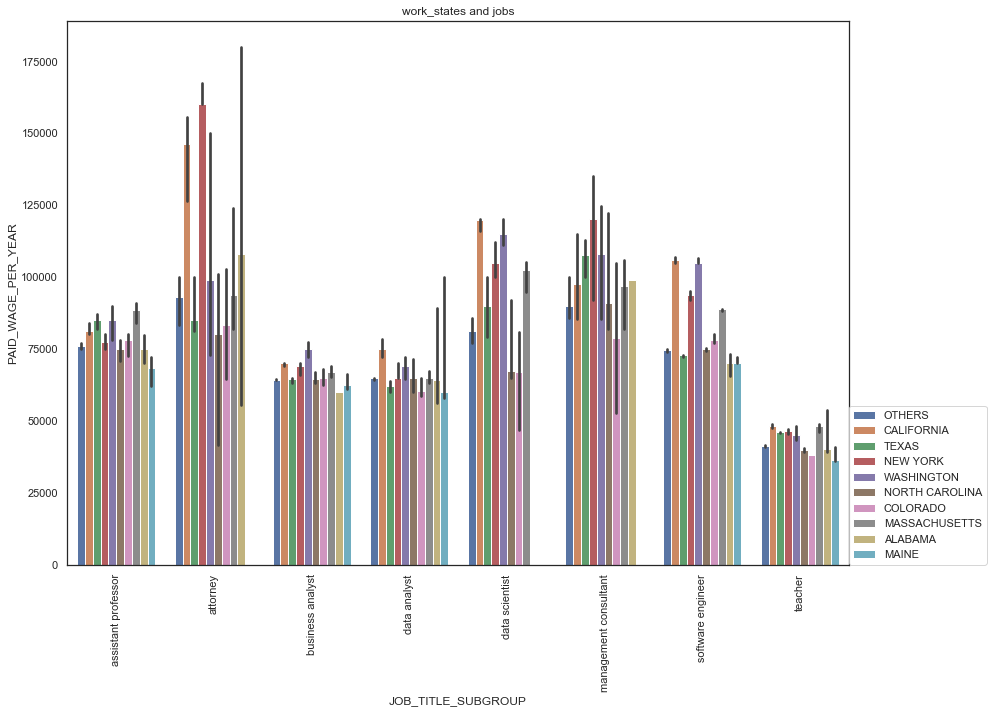

In [22]:
# plotting job title subgroup against work state to identify how different jobs are varied among different states
plt.figure(figsize=(14,10))
state_job_bar=sns.barplot(x=salary1.JOB_TITLE_SUBGROUP,y=salary1.PAID_WAGE_PER_YEAR,hue=salary1.WORK_STATE,estimator=np.median)
plt.legend(loc=(1,0))
plt.xticks(rotation=90)
plt.title('work_states and jobs')
plt.show()

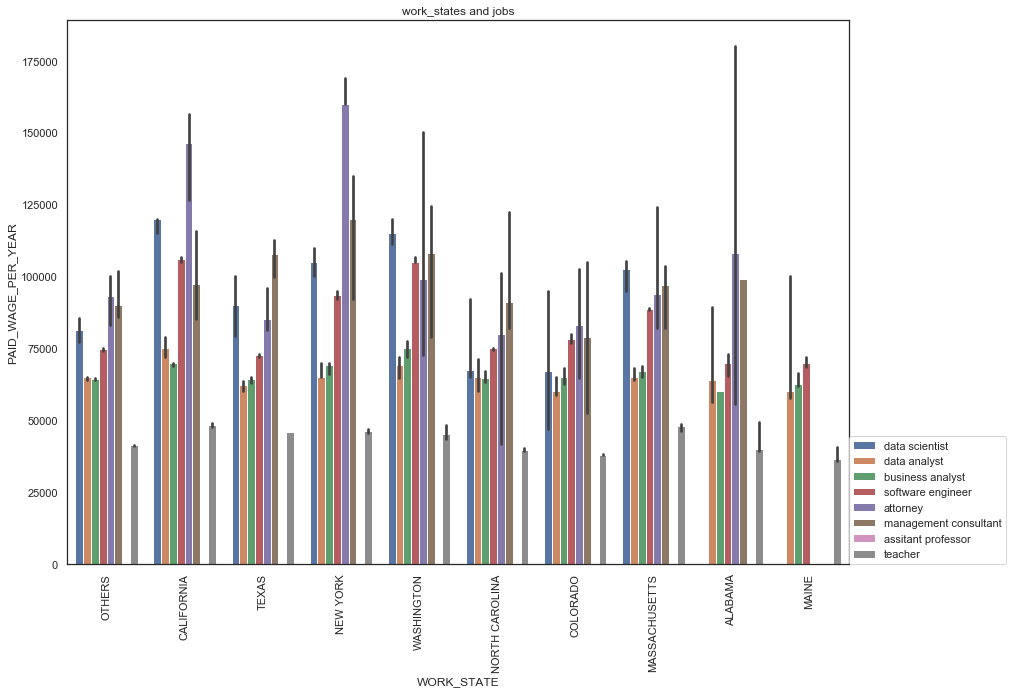

In [23]:
# plotting job title subgroup against work state to identify how different jobs are varied among different states
lis=['data scientist','data analyst','business analyst','software engineer','attorney','management consultant','assitant professor'\
       , 'teacher']
plt.figure(figsize=(14,10))
state_job_bar=sns.barplot(x=salary1.WORK_STATE,y=salary1.PAID_WAGE_PER_YEAR,hue=salary1.JOB_TITLE_SUBGROUP,estimator=np.median,\
                          hue_order=lis)
plt.legend(loc=(1,0))
plt.xticks(rotation=90)
plt.title('work_states and jobs')
plt.show()

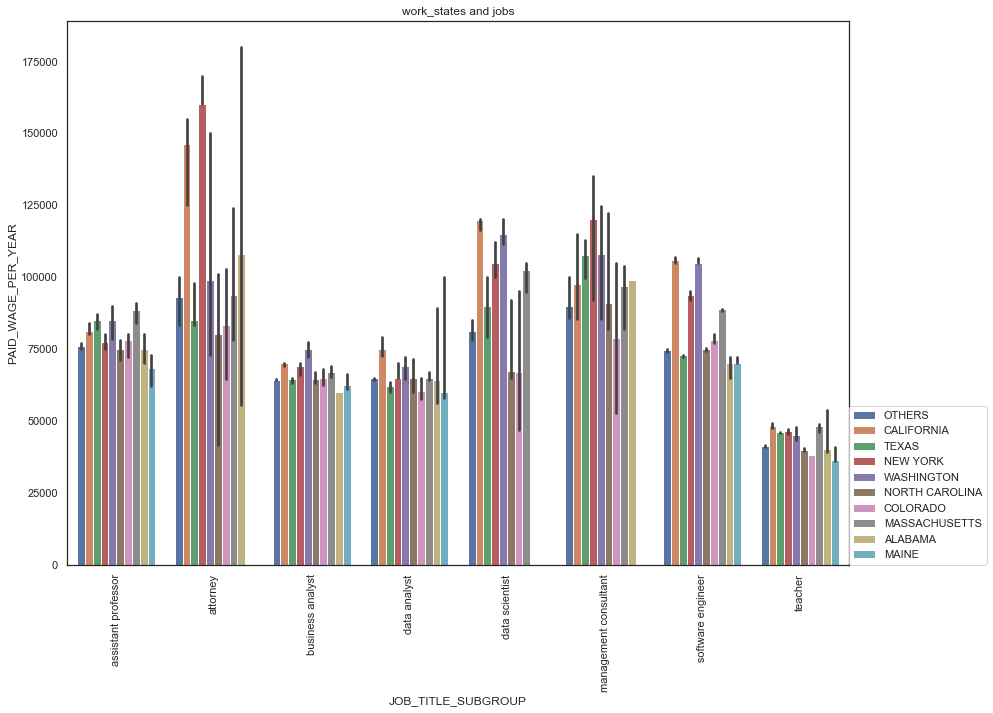

In [24]:
# plotting job title subgroup against work state to identify how different jobs are varied among different states
plt.figure(figsize=(14,10))
state_job_bar=sns.barplot(x=salary1.JOB_TITLE_SUBGROUP,y=salary1.PAID_WAGE_PER_YEAR,hue=salary1.WORK_STATE,estimator=np.median)
plt.legend(loc=(1,0))
plt.xticks(rotation=90)
plt.title('work_states and jobs')
plt.show()

---

## When to use line graphs

### Best for cnveying two types of information
- how things change over time.
- how two continuous variables relate to one another



## Understading how salaries vary over time

as we could see the graph came out to be abosolute conntinuous and quite complicated to extract insights. We need a discrete graph, hence following is the required graph.

In [25]:
#Setting up the default figure size
sns.set(rc={'figure.figsize':(14,15)},style='white')

In [26]:
salary1.CASE_RECEIVED_DATE= pd.to_datetime(salary1.CASE_RECEIVED_DATE)
salary2=salary1.set_index('CASE_RECEIVED_DATE')
salary2.info()
salary2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167278 entries, 2014-03-14 to 2011-10-24
Data columns (total 10 columns):
JOB_TITLE_SUBGROUP                167278 non-null category
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null object
VISA_CLASS                        167278 non-null category
dtypes: category(4), float64(3), object(3)
memory usage: 9.6+ MB


,JOB_TITLE_SUBGROUP,JOB_TITLE,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,PAID_WAGE_PER_YEAR,FULL_TIME_POSITION_Y_N,WORK_STATE,VISA_CLASS
CASE_RECEIVED_DATE,,,,,,,,,,
2014-03-14,software engineer,SOFTWARE ENGINEER,6217100.0,year,62171.0,year,62171.0,y,OTHERS,H-1B
2015-03-19,assistant professor,Assistant Professor of Marketing,5067600.0,year,91440.0,year,91440.0,NaN,CALIFORNIA,greencard
2013-09-13,teacher,SPECIAL EDUCATION TEACHER,4947000.0,year,49470.0,year,49470.0,y,CALIFORNIA,H-1B
2014-03-28,teacher,SCIENCE TEACHER,251052.0,month,43800.0,year,43800.0,y,TEXAS,H-1B
2014-09-16,software engineer,SENIOR SOFTWARE ENGINEER,84573.0,bi-weekly,170000.0,year,170000.0,y,OTHERS,E-3 Australian


<Figure size 720x576 with 0 Axes>

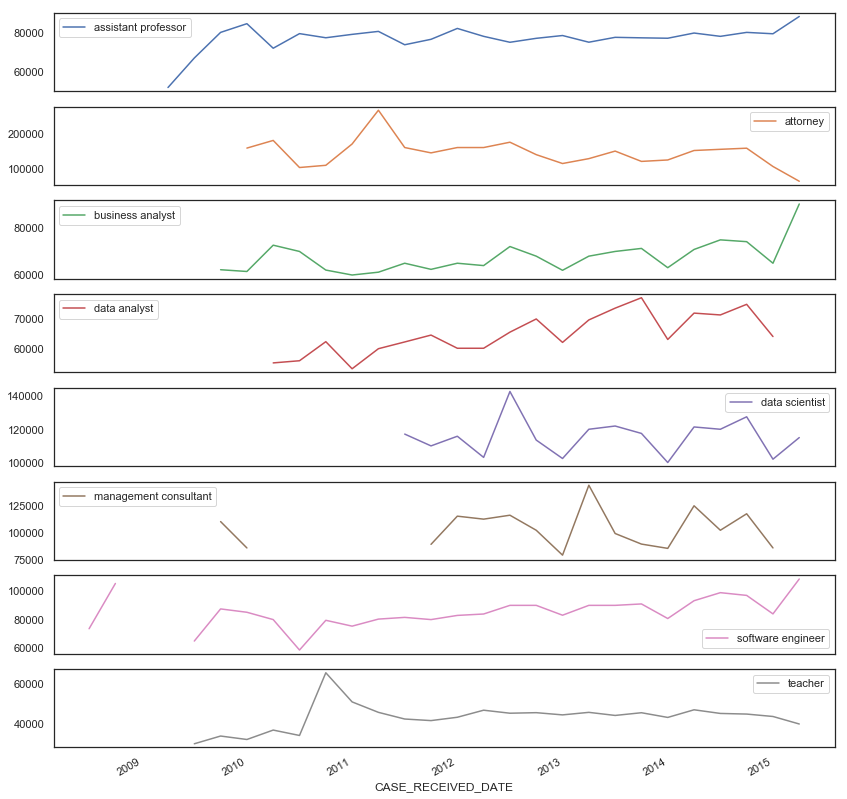

In [27]:
#filtering dataset
year_median= salary2.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].resample('Q').median()
line_plot_data = year_median.unstack().transpose()

plt.figure(figsize=(10,8))
line_plot = line_plot_data.plot(kind='line',subplots=True)
#plt.legend(loc=(1,0))
plt.show()

In [28]:
x=line_plot_data.reindex(level=1)
x

JOB_TITLE_SUBGROUP,assistant professor,attorney,business analyst,data analyst,data scientist,management consultant,software engineer,teacher
CASE_RECEIVED_DATE,,,,,,,,
2008-09-30,NaN,NaN,NaN,NaN,NaN,NaN,73562.00,NaN
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,105396.80,43379.00
2009-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-30,52135.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,67040.00,NaN,NaN,65724.00,NaN,NaN,64900.00,29860.00
2009-12-31,80000.00,NaN,62240.0,NaN,NaN,110000.0,87500.00,33720.00
2010-03-31,84400.00,158441.0,61500.0,NaN,NaN,85680.0,85145.00,32000.00
2010-06-30,71990.50,180000.0,72662.5,55000.00,NaN,NaN,80000.00,36692.98
2010-09-30,79375.00,103784.0,70000.0,55739.00,NaN,NaN,58600.00,34000.00


#### The above plot helps us to understand the pattern of salary changes among different jobs over a period of time. 

---

## Scatter plot

In [29]:
scatter_plot_data= line_plot_data
scatter_plot_data

JOB_TITLE_SUBGROUP,assistant professor,attorney,business analyst,data analyst,data scientist,management consultant,software engineer,teacher
CASE_RECEIVED_DATE,,,,,,,,
2008-09-30,NaN,NaN,NaN,NaN,NaN,NaN,73562.00,NaN
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,105396.80,43379.00
2009-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-30,52135.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,67040.00,NaN,NaN,65724.00,NaN,NaN,64900.00,29860.00
2009-12-31,80000.00,NaN,62240.0,NaN,NaN,110000.0,87500.00,33720.00
2010-03-31,84400.00,158441.0,61500.0,NaN,NaN,85680.0,85145.00,32000.00
2010-06-30,71990.50,180000.0,72662.5,55000.00,NaN,NaN,80000.00,36692.98
2010-09-30,79375.00,103784.0,70000.0,55739.00,NaN,NaN,58600.00,34000.00


In [30]:
salary2=salary2.reset_index()


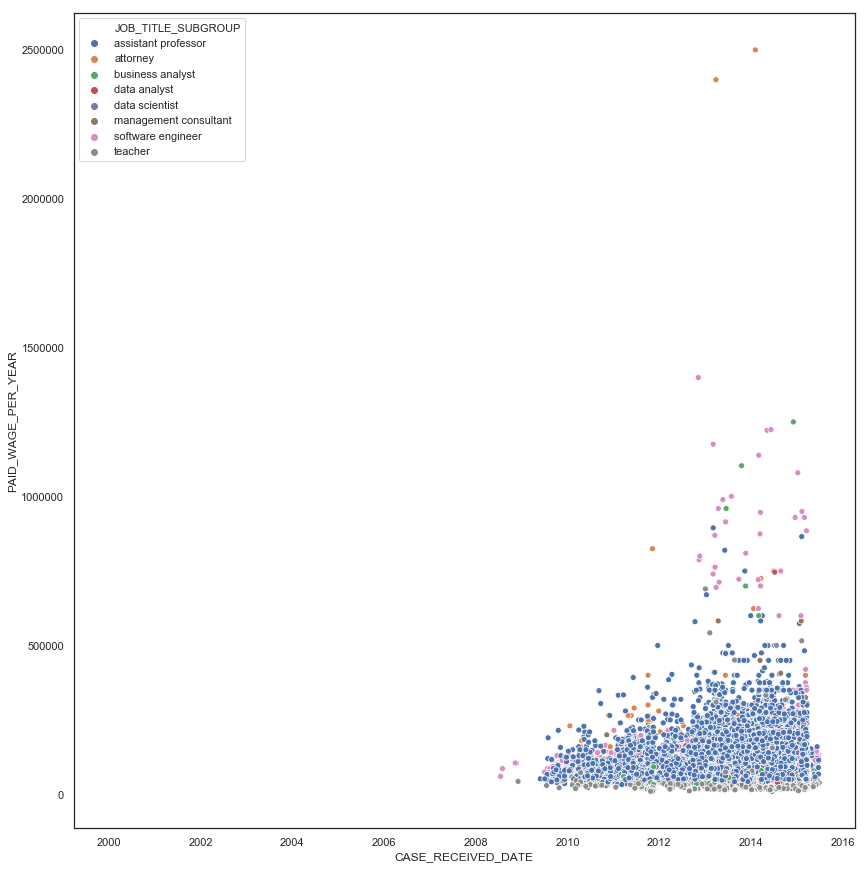

In [33]:
scatter_plot = sns.scatterplot(x=salary2.CASE_RECEIVED_DATE,y=salary2.PAID_WAGE_PER_YEAR,hue=salary2.JOB_TITLE_SUBGROUP,\
                               estimator=np.mean)

In [34]:
salary2 = salary2.set_index('CASE_RECEIVED_DATE')
salary2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167278 entries, 2014-03-14 to 2011-10-24
Data columns (total 10 columns):
JOB_TITLE_SUBGROUP                167278 non-null category
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null object
VISA_CLASS                        167278 non-null category
dtypes: category(4), float64(3), object(3)
memory usage: 9.6+ MB


In [35]:
sc_plot_data= salary2.resample('Y').median()

In [36]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 11 columns):
JOB_TITLE_SUBGROUP                167278 non-null category
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null category
VISA_CLASS                        167278 non-null category
CASE_RECEIVED_DATE                167278 non-null object
dtypes: category(5), float64(3), object(3)
memory usage: 8.5+ MB


In [37]:
sc_plot_data=salary1.loc[:,['CASE_RECEIVED_DATE','JOB_TITLE_SUBGROUP','PAID_WAGE_PER_YEAR']]
sc_plot_data.CASE_RECEIVED_DATE=pd.to_datetime(sc_plot_data['CASE_RECEIVED_DATE'])
sc_plot_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 3 columns):
CASE_RECEIVED_DATE    167278 non-null datetime64[ns]
JOB_TITLE_SUBGROUP    167278 non-null category
PAID_WAGE_PER_YEAR    167278 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 2.7 MB


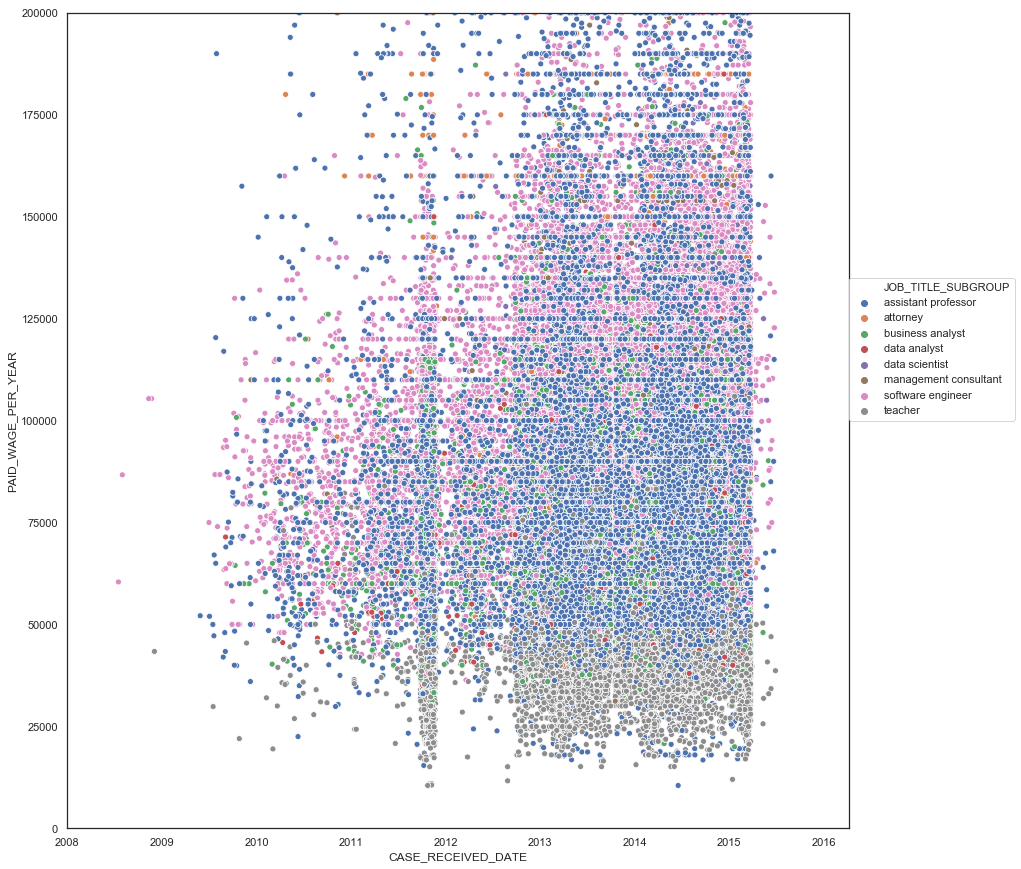

In [92]:
import datetime as dt
min_date= dt.datetime(2008,1,1)
sc_plot=sns.scatterplot(x='CASE_RECEIVED_DATE',y='PAID_WAGE_PER_YEAR',data=sc_plot_data,hue='JOB_TITLE_SUBGROUP',estimator=np.mean)
plt.xlim(xmin=min_date)
plt.ylim(ymin=0,ymax=200000)
plt.legend(loc=(1,.5))
plt.show()

---

### BOX PLOTS

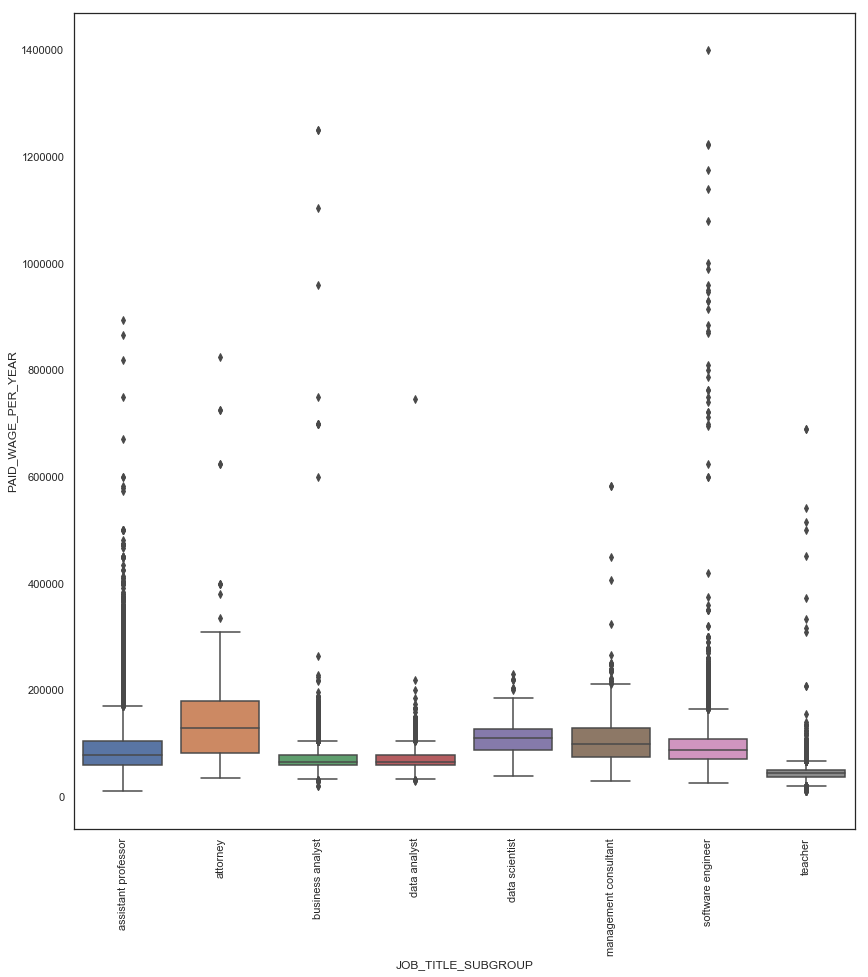

In [50]:
# PLotting BOXPLOT for above graph to identify presence of outlier

#ticks = [0,50000,75000,100000,125000,150000,175000,200000,225000,250000]
salary_job_boxplot= sns.boxplot(y=salary1.PAID_WAGE_PER_YEAR,x=salary1.JOB_TITLE_SUBGROUP)
#plt.yticks(ticks)
plt.xticks(rotation=90)
plt.show()

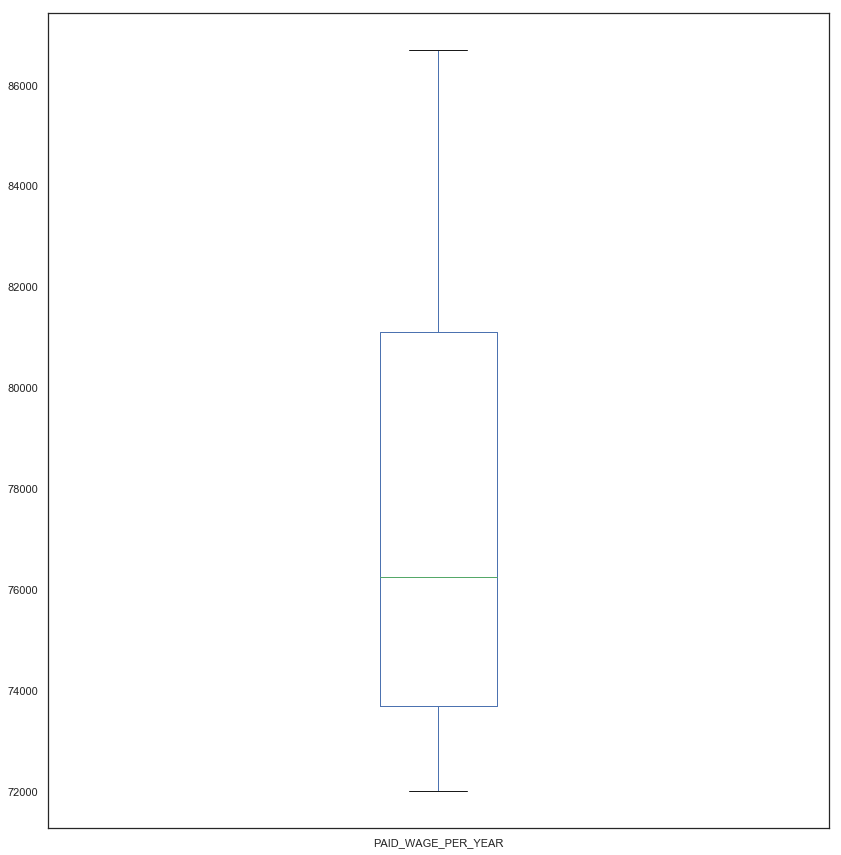

In [100]:
#preparing set to boxplot for salaries
salary.CASE_RECEIVED_DATE = pd.to_datetime(salary['CASE_RECEIVED_DATE'])
box1_data = salary.set_index('CASE_RECEIVED_DATE')
box1_data.info()
box_data= box1_data.resample('Y').median()['PAID_WAGE_PER_YEAR']
box_data


box_plot1= box_data.plot(kind='box')

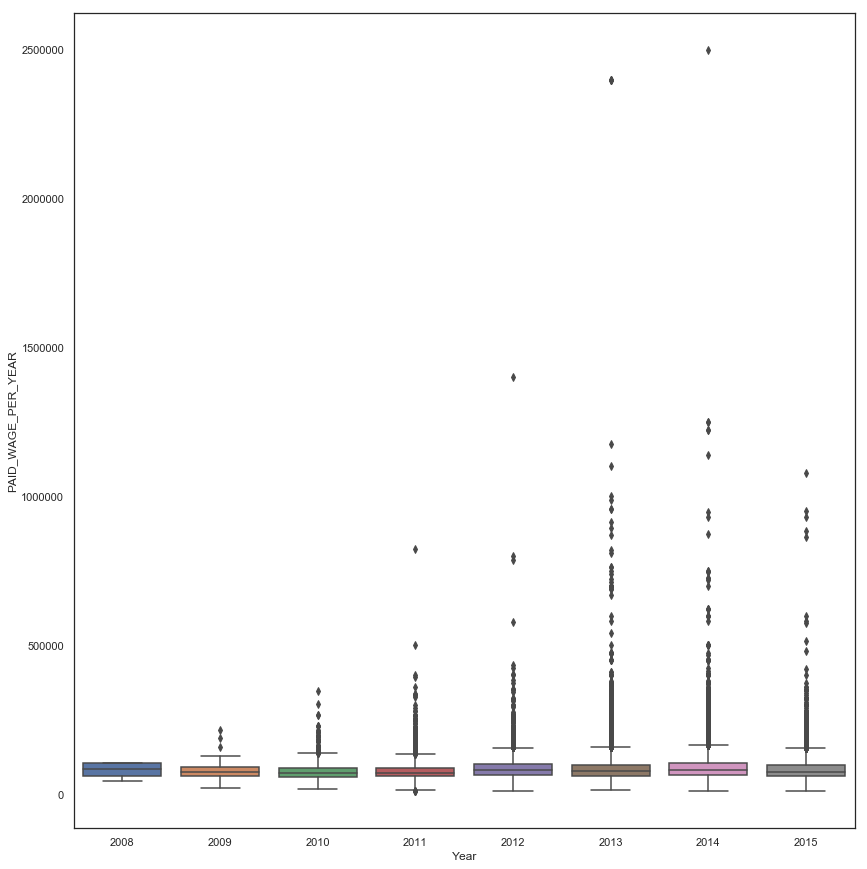

In [103]:
# creating a separate columns for year to understand yearwise data performance
salary['Year']= salary['CASE_RECEIVED_DATE'].dt.year


box_plot2= sns.boxplot(x=salary.Year,y=salary.PAID_WAGE_PER_YEAR)

### Plotting box plots for different job titles

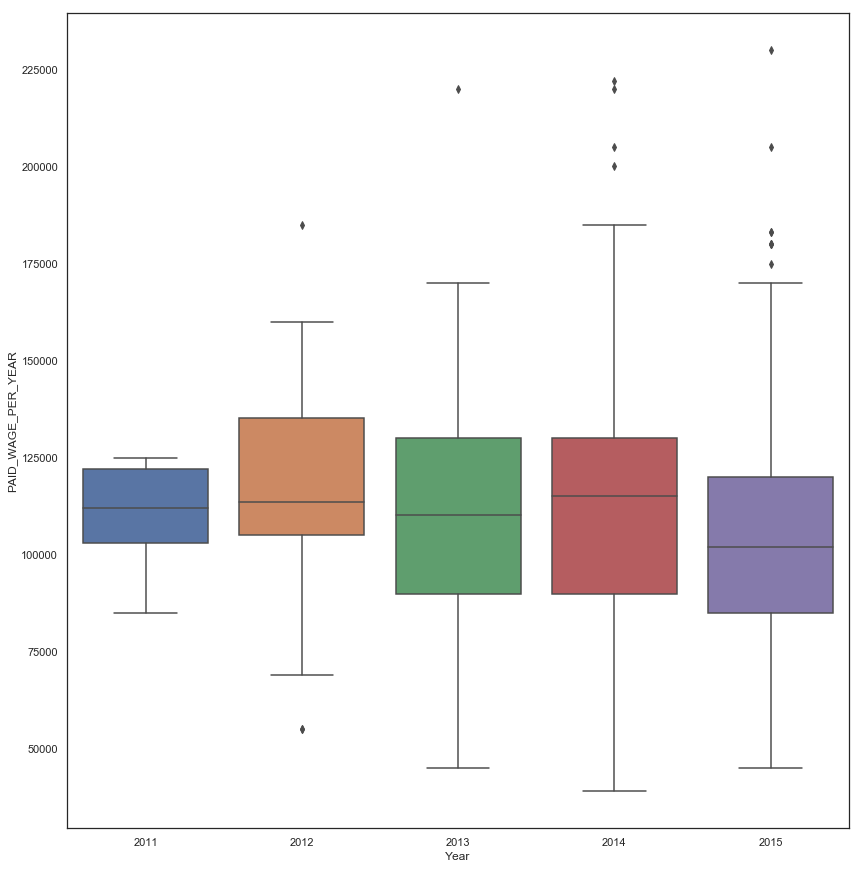

In [105]:
# Data scientist job profile

ds_data= salary.loc[salary.JOB_TITLE_SUBGROUP=='data scientist',]
ds_boxPlot= sns.boxplot(x=ds_data.Year,y=ds_data.PAID_WAGE_PER_YEAR)

In [106]:
# Creating a fucntion that creates box plot based on different job profile inputs

def BoxPlot(profile):
    object_data = salary.loc[salary.JOB_TITLE_SUBGROUP==profile,]
    object_box_plot = sns.boxplot(x=object_data.Year,y=object_data.PAID_WAGE_PER_YEAR)
    return object_box_plot

BoxPlot('attorney')

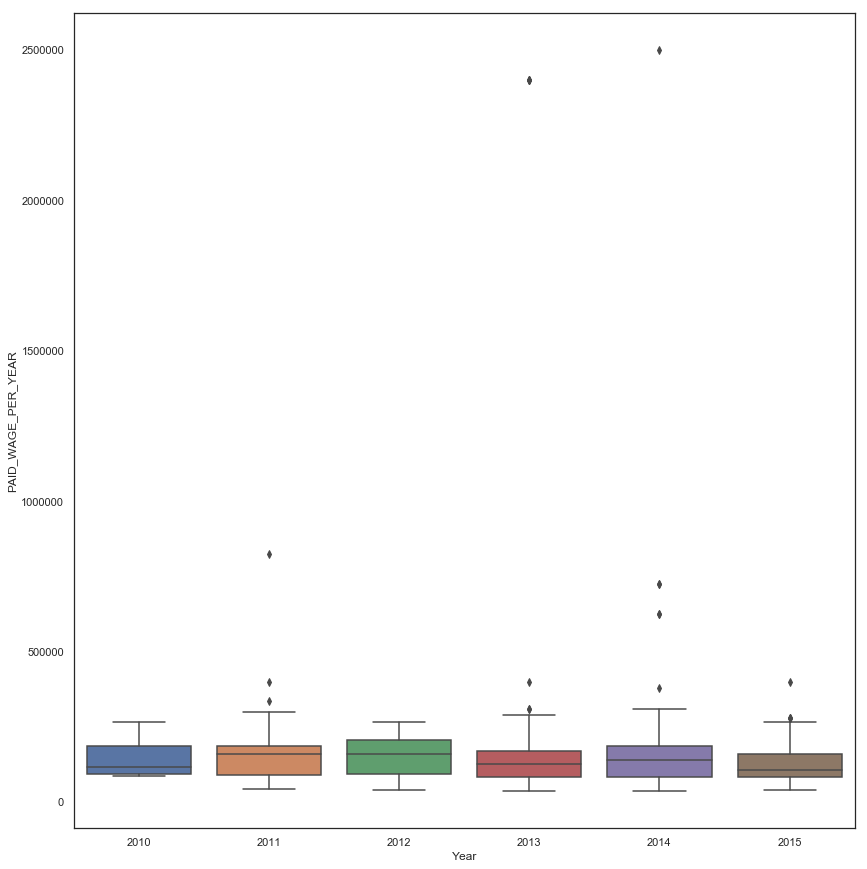

---

# testing block

In [95]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 11 columns):
JOB_TITLE_SUBGROUP                167278 non-null category
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null category
VISA_CLASS                        167278 non-null category
CASE_RECEIVED_DATE                167278 non-null object
dtypes: category(5), float64(3), object(3)
memory usage: 8.5+ MB


In [42]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [93]:
salary1 = salary.loc[salary.PAID_WAGE_PER_YEAR<1500000,]

In [43]:
c=salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].value_counts().unstack().fillna(0)
c

PAID_WAGE_PER_YEAR,10500.0,10504.0,10608.0,10920.0,11648.0,12000.0,15100.8,15142.4,15425.279999999999,15600.0,...,1080000.0,1103711.73,1139001.0,1176000.0,1222788.0,1224800.6,1250784.0,1400000.0,2400000.0,2500000.0
JOB_TITLE_SUBGROUP,,,,,,,,,,,,,,,,,,,,,
assistant professor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attorney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
business analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
data analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data scientist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
management consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
software engineer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
teacher,0.0,2.0,1.0,2.0,4.0,1.0,6.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# sort try
sort = salary1.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].median().sort_values()
sort

JOB_TITLE_SUBGROUP
teacher                   44896.0
business analyst          65000.0
data analyst              65000.0
assistant professor       78000.0
software engineer         88275.2
management consultant    100000.0
data scientist           110000.0
attorney                 130000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [75]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 11 columns):
JOB_TITLE_SUBGROUP                167278 non-null category
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null category
VISA_CLASS                        167278 non-null category
CASE_RECEIVED_DATE                167278 non-null object
dtypes: category(5), float64(3), object(3)
memory usage: 8.5+ MB


In [44]:
graph3 = plt.scatter(data=a,x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR)
plt.xticks(rotation=90)
plt.show()

NameError: name 'a' is not defined

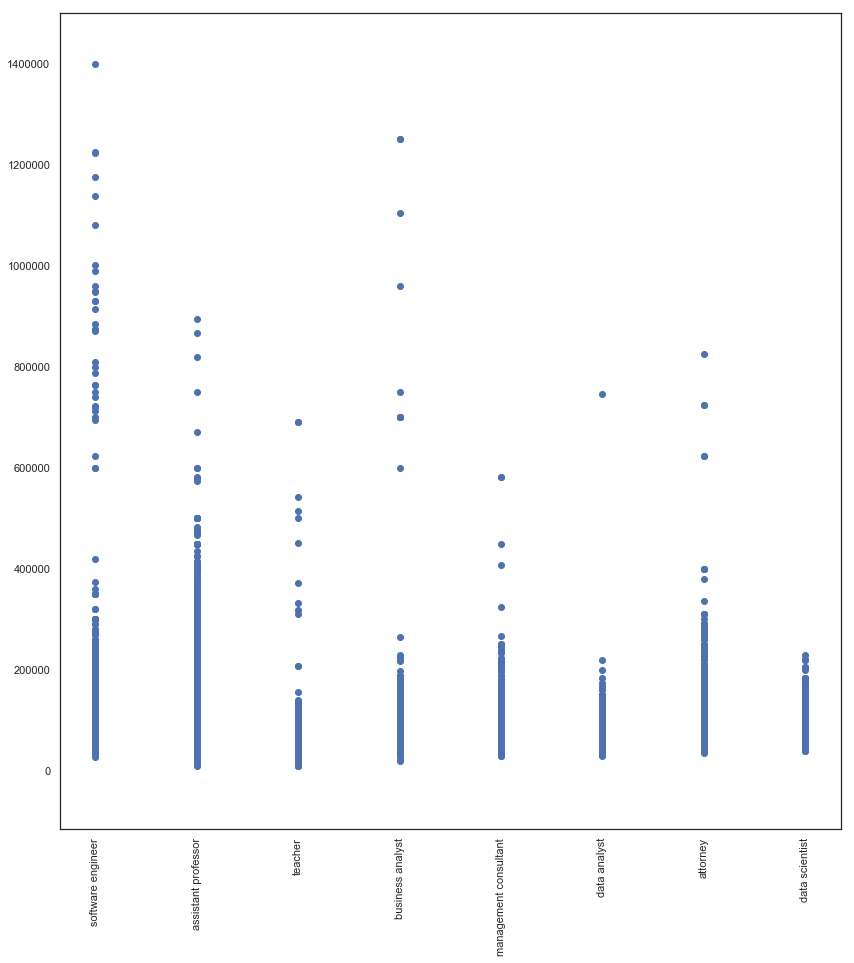

In [112]:
graph4 = plt.scatter(data=b,x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR)
plt.ylim(ymax=1500000)
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary.loc[(salary.JOB_TITLE_SUBGROUP=='attorney') & (salary.PAID_WAGE_PER_YEAR >1500000)]

In [111]:
b= salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR']